In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import shap

#### Explore dataset

In [101]:
data=pd.read_csv("dataset_phishing.csv")
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [102]:
print(" The number of rows is:",data.shape[0],"\n","The numbe of features is:",data.shape[1])

 The number of rows is: 11430 
 The numbe of features is: 89


In [103]:
leg=data[data["status"]=="legitimate"].url.count()
phishing=data[data["status"]=="phishing"].url.count()
print(" The number of legimiate and phishing websites in this dataset")
print(" legitimate:",leg,"\n","phishing:",phishing)

 The number of legimiate and phishing websites in this dataset
 legitimate: 5715 
 phishing: 5715


In [104]:
data.describe()
# max values shows the outliers

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [105]:
# change status to numerical 0 for phishing and 1 for legitimate websites
data['target']=pd.get_dummies(data['status'])['phishing'].astype('int')
data.drop('status',axis=1,inplace=True)
data[['url','target']].head(5)

,url,target
0,http://www.crestonwood.com/router.php,0
1,http://shadetreetechnology.com/V4/validation/a...,1
2,https://support-appleld.com.secureupdate.duila...,1
3,http://rgipt.ac.in,0
4,http://www.iracing.com/tracks/gateway-motorspo...,0


In [106]:
# search for missing values in dataset
data.isnull().sum().reset_index(name='missing_val')

,index,missing_val
0,url,0
1,length_url,0
2,length_hostname,0
3,ip,0
4,nb_dots,0
...,...,...
84,web_traffic,0
85,dns_record,0
86,google_index,0
87,page_rank,0


#### Feature Corrolation

In [107]:
corr_matrix = data.corr()
corr_matrix['target']

length_url         0.248580
length_hostname    0.238322
ip                 0.321698
nb_dots            0.207029
nb_hyphens        -0.100107
                     ...   
web_traffic        0.060388
dns_record         0.122119
google_index       0.731171
page_rank         -0.511137
target             1.000000
Name: target, Length: 88, dtype: float64

#### Pre-proceesing

In [108]:
X=data.loc[:, ~data.columns.isin(['target','url'])]
y=data['target']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

#### Model Fitting

In [111]:
model_random_forest = RandomForestClassifier(n_estimators=350,
                                             random_state=42)
model_random_forest.fit(X_train,y_train)                                         

RandomForestClassifier(n_estimators=350, random_state=42)

In [113]:
y_predicted=model_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print('Model Accuracy: {0:4f}'.format(accuracy))
oconfusion_matrix = confusion_matrix(y_test, y_predicted)
print('Confusion Matrix: \n {}'.format(oconfusion_matrix))

Model Accuracy: 0.968066
Confusion Matrix: 
 [[1128   29]
 [  44 1085]]


#### SHAP Feature Importance

In [126]:
explainer = shap.TreeExplainer(model_random_forest)
shap_values = explainer.shap_values(X_test)

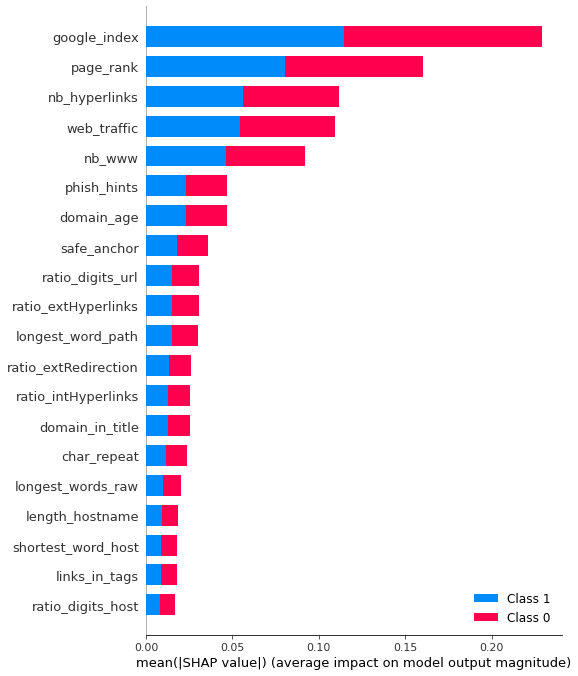

In [127]:
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)